# Proposal for new plot

##  Data preparation

In [1]:
%pylab inline
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np

In [5]:
phenomenology1=['MD','mf1','mf2','mH','mA','mE1','mE2','mu->e gamma','alfa','delta','y1','rho1','eta2','eta3',
               'f2','f3','f1','rho2','rho3','k','I1','I2','mu','Rmuv']
x1=np.loadtxt('scanmuegamma_Apositive_oct30.txt')
x1d=pd.DataFrame(x1,columns=phenomenology1)
y1=x1d[np.abs(x1d['delta'])<0.2]
y2=y1[y1['mE2']/y1['mE1']>1.1]
y3=y2[np.abs(y2['mu'])<40]
y4=y3[np.abs(y3['alfa'])<0.2]
y2d=y4[y4['mu->e gamma']<5.3e-13]

##  Analytical expectations
In the case $\rho=\rho_1=\rho_2$ and fixing all the other parameters except by $\eta=\eta_1$ we expect 
\begin{equation}
{\cal B}(\mu\to e\gamma)=A \rho^2 + B \rho\eta + C \eta^2 + \frac{D}{\eta^2 } 
\end{equation}
In this way we expect elipse-like contours  eiter in the plane 
### A)  $\eta, \rho,$

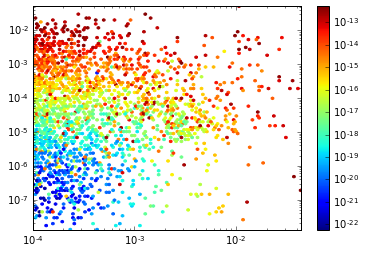

In [6]:
plt.hexbin(y2d['y1'],y2d['rho1']*y2d['rho2'],y2d['mu->e gamma'],yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

or
### B)  $1/\eta, \rho$

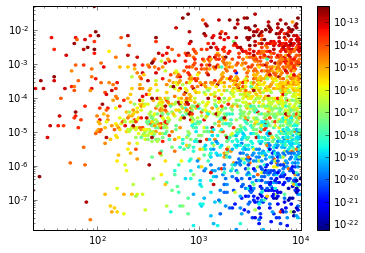

In [7]:
plt.hexbin(1./y2d['y1'],y2d['rho1']*y2d['rho2'],y2d['mu->e gamma'],yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

##  Results
In fact, just fixing $\rho_1\sim\rho_2$ with the avalaible data, the correlation improves a lot:

In [8]:
yf=y2d[np.logical_and( np.abs(y2d.rho1/y2d.rho2)>0.5,np.abs(y2d.rho1/y2d.rho2)<1.5     )]

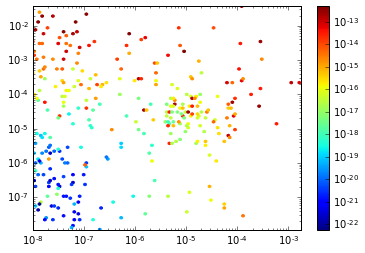

In [22]:
plt.hexbin(yf.y1**2,yf.rho2**2,yf['mu->e gamma'],yscale='log',xscale='log',norm=LogNorm())
plt.colorbar()

## Conclusion
A plot along this lines may be is enough